In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<font size = 8 color = Black> ***Task 1 EDA (Exploratory Data Analysis)*** 

## <font size = 6 color = steelblue> ***Importing/Loading the Datasets***

In [10]:
customer_data = pd.read_csv("Customers.csv")
product_data = pd.read_csv("Products.csv")
transaction_data = pd.read_csv("Transactions.csv")
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [11]:
customer_data.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [12]:
product_data

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [13]:
transaction_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


<font size = 6 color = midnightblue> **Shapes of data**

In [14]:
print(f"Customer Data Shape   : {customer_data.shape}")
print(f"Product Data Shape    : {product_data.shape}")
print(f"Transaction Data Shape: {transaction_data.shape}")

Customer Data Shape   : (200, 4)
Product Data Shape    : (100, 4)
Transaction Data Shape: (1000, 7)


## To Find Datasets Null Values

In [15]:
print(f"-------------Count of Null Values in Datasets--------------\n")
print(f"     Customer Data null values  \n{customer_data.isna().sum()}\n")
print(f"     Product Data null values \n{product_data.isna().sum()}\n")
print(f"     Transaction Data null values \n{transaction_data.isna().sum()}")

-------------Count of Null Values in Datasets--------------

     Customer Data null values  
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

     Product Data null values 
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

     Transaction Data null values 
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## **There is no null values in any datasets**

In [74]:
print(f"Minimim Product Price :", product_data['Price'].min())
print(f"Maximum Product Price : ",product_data.Price.max())
print(f"Average Product Price : ",product_data['Price'].mean().round(2))
print(f"Transaction Start     :",transaction_data['TransactionDate'].min())
print(f"Last Transaction      :", transaction_data['TransactionDate'].max())

Minimim Product Price : 16.08
Maximum Product Price :  497.76
Average Product Price :  267.55
Transaction Start     : 2023-12-30 15:29:12
Last Transaction      : 2024-12-28 11:00:00


<font size = 6 color = steelblue> **Merging all Datasets into one**

In [16]:
merge = pd.merge(customer_data,transaction_data,on = 'CustomerID')
data = pd.merge(merge,product_data,left_on='ProductID',right_on="ProductID")
data.drop(columns=['Price_y'],inplace=True)
data.rename(columns={'Price_x':'Price'},inplace=True)
data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics


## To change datetime columns into pandas datetime format

In [17]:
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [18]:
data.columns

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate', 'TransactionID',
       'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price',
       'ProductName', 'Category'],
      dtype='object')

## Columns Datatypes

In [19]:
data.dtypes

CustomerID                 object
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
TransactionID              object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
ProductName                object
Category                   object
dtype: object

## Summary/Statistics of Data

In [20]:
data.describe()

,SignupDate,TransactionDate,Quantity,TotalValue,Price
count,1000,1000,1000.000000,1000.000000,1000.00000
mean,2023-07-09 02:49:55.199999744,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2022-01-22 00:00:00,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2022-09-17 12:00:00,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2023-07-23 00:00:00,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-04-12 00:00:00,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 00:00:00,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,NaN,1.117981,493.144478,140.73639


<font size = 6 color = steelblue> **Top 10 Products by Sales**

In [21]:
products = data.groupby('ProductName')[['Price','TotalValue']].sum().sort_values(ascending=False,by ='TotalValue')[:10]
products

,Price,TotalValue
ProductName,,
ActiveWear Smartwatch,15977.27,39096.97
SoundWave Headphones,10025.71,25211.64
SoundWave Novel,8414.70,24507.90
ActiveWear Jacket,7896.12,22712.56
ActiveWear Rug,8255.08,22314.43
TechPro Headphones,7371.88,19513.80
BookWorld Cookbook,8248.99,19221.99
BookWorld Sweater,7632.27,18743.79
TechPro Textbook,7196.85,18267.96


<font size = 6 color = steelblue> **Top 10 Customers**

In [22]:
customers = data.groupby('CustomerName')[['Quantity','TotalValue']].sum().sort_values(by='TotalValue',ascending=False)[:10]
customers

,Quantity,TotalValue
CustomerName,,
Paul Parsons,27,10673.87
Bruce Rhodes,24,8040.39
Gerald Hines,27,7663.70
William Adams,28,7634.45
Aimee Taylor,23,7572.91
Anna Ball,21,7111.32
Mrs. Kimberly Wright,21,7073.28
Jennifer Pena,24,6819.57
Rodney Eaton,21,6715.72


## Regionwise Sales Anaysis

In [23]:
regions = data.groupby("Region")[['Quantity','Price','TotalValue']].agg(['mean','max','min','count','sum',])
regions

Quantity                          Price                       \
                   mean max min count  sum        mean     max    min count   
Region                                                                        
Asia           2.568807   4   1   218  560  271.284541  497.76  26.26   218   
Europe         2.542735   4   1   234  595  275.569017  497.76  26.26   234   
North America  2.430328   4   1   244  593  265.242090  497.76  16.08   244   
South America  2.595395   4   1   304  789  277.012566  497.76  16.08   304   

                         TotalValue                                   
                    sum        mean      max    min count        sum  
Region                                                                
Asia           59140.03  697.591606  1818.12  33.59   218  152074.97  
Europe         64483.15  710.489872  1927.12  26.99   234  166254.63  
North America  64719.07  624.235246  1954.52  16.08   244  152313.40  
South America  84211.82  721.554474  1991.04  16.08   304  219352.56

### Region South America sales more quantity & Revenue then others
### Region Asia has least sales among them

<font size = 6 color = steelblue> ***Category wise Sales Analysis***

In [24]:
categories = data.groupby("Category")[['Quantity','Price','TotalValue']].agg(['mean','min','max','count','sum'])
categories

Quantity                          Price                       \
                 mean min max count  sum        mean    min     max count   
Category                                                                    
Books        2.522222   1   4   270  681  280.526222  33.59  497.76   270   
Clothing     2.587719   1   4   228  590  283.104254  18.82  481.78   228   
Electronics  2.468504   1   4   254  627  288.722008  16.08  459.86   254   
Home Decor   2.576613   1   4   248  639  237.616250  41.18  454.53   248   

                       TotalValue                                   
                  sum        mean    min      max count        sum  
Category                                                            
Books        75742.08  711.657296  33.59  1991.04   270  192147.47  
Clothing     64547.77  728.818684  30.59  1927.12   228  166170.66  
Electronics  73335.39  711.746063  16.08  1839.44   254  180783.50  
Home Decor   58928.83  608.443266  41.18  1818.12   248  150893.93

### Category Books has highest sales
### Category Home Decor has least sales among them

<font size = 6 color = steelblue> Correlation in Data

In [25]:
data_corr = data.corr(numeric_only=True)
data_corr

,Quantity,TotalValue,Price
Quantity,1.000000,0.609972,-0.009378
TotalValue,0.609972,1.000000,0.722714
Price,-0.009378,0.722714,1.000000


In [26]:
data.head(2)

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor


## Count & Total of Sales with Category & Regions

In [27]:
pd.crosstab(index = data['Region'],columns=data['Category'],values=data['TotalValue'],aggfunc=(['count','sum']))

count                                       sum            \
Category      Books Clothing Electronics Home Decor     Books  Clothing   
Region                                                                    
Asia             51       58          57         52  33119.03  49353.09   
Europe           64       47          58         65  47464.42  36335.59   
North America    65       60          60         59  41811.99  38038.49   
South America    90       63          79         72  69752.03  42443.49   

                                      
Category      Electronics Home Decor  
Region                                
Asia             35658.15   33944.70  
Europe           41562.60   40892.02  
North America    44716.43   27746.49  
South America    58846.32   48310.72

In [28]:
weekly_sales = data.set_index(['TransactionDate'])['TotalValue'].resample('7D').sum(numeric_only=True).sort_index()

## Weekly Sales 1 from 2023-12-30 to 2024-06-15

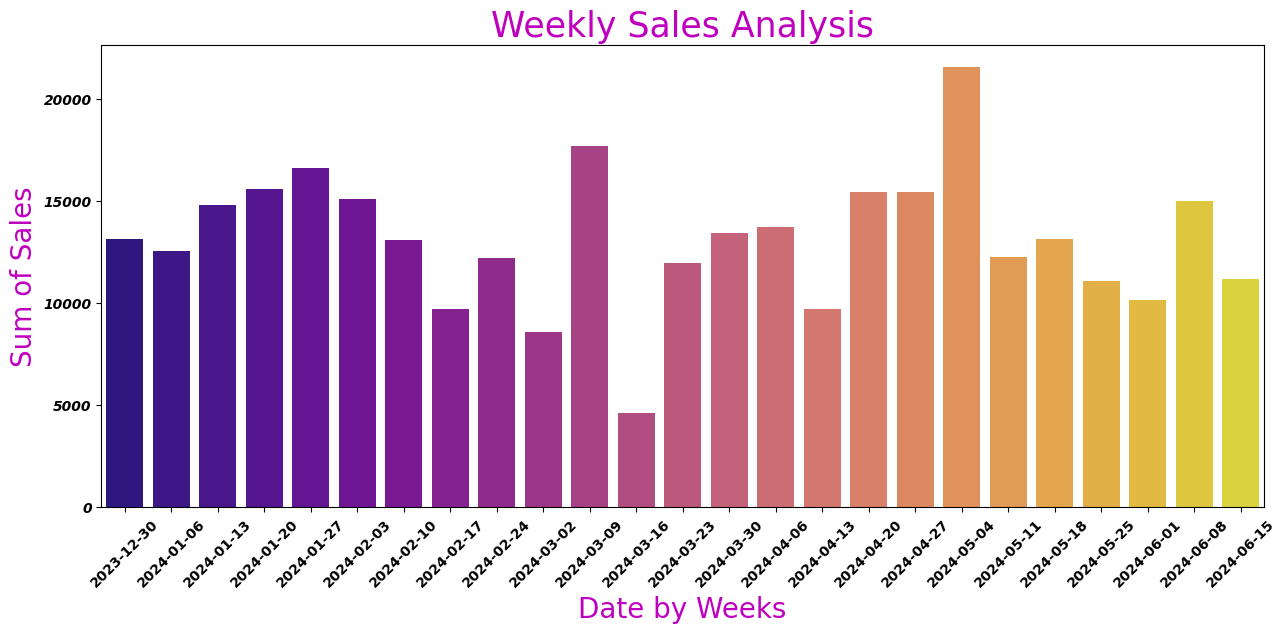

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x =weekly_sales[:25].index,y=weekly_sales[:25].values,hue = weekly_sales[:25].index,palette='plasma')
plt.title("Weekly Sales Analysis",size = 25,color = 'm')
plt.xlabel("Date by Weeks",size = 20,color = 'm')
plt.ylabel("Sum of Sales",size = 20,color = 'm')
plt.xticks(rotation = 45,weight = 'bold')
plt.yticks(weight = 'bold',style = 'italic')
plt.show()

## Weekly Sales 2 from 2024-06-22 to 2024-12-28 

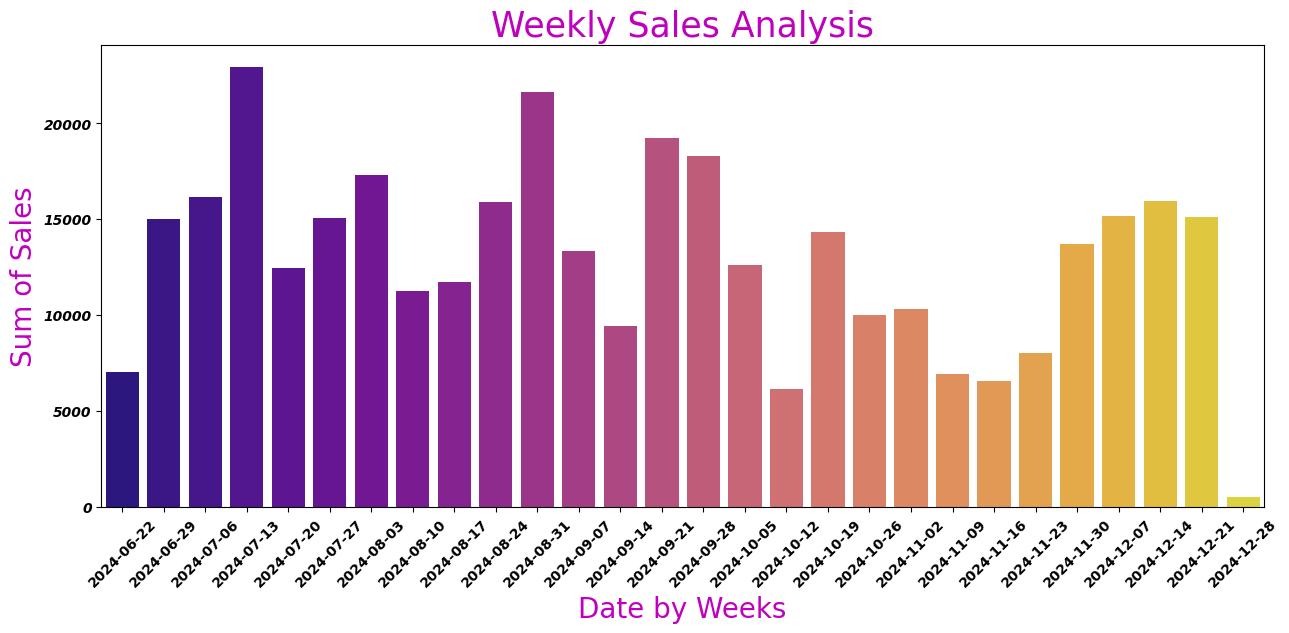

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(x =weekly_sales[25:].index,y=weekly_sales[25:].values,hue = weekly_sales[25:].index,palette='plasma')
plt.title("Weekly Sales Analysis",size = 25,color = 'm')
plt.xlabel("Date by Weeks",size = 20,color = 'm')
plt.ylabel("Sum of Sales",size = 20,color = 'm')
plt.xticks(rotation = 45,weight = 'bold')
plt.yticks(weight = 'bold',style = 'italic')
plt.show()

## Week Sales trends in different Months

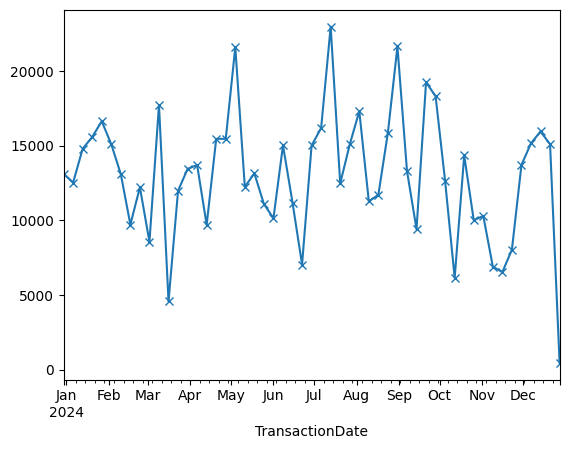

In [31]:
weekly_sales.plot(marker = 'x')
plt.show()

In [32]:
monthly_sales = data.set_index(['TransactionDate'])['TotalValue'].resample('ME').sum(numeric_only=True).round(0)
monthly_sales

TransactionDate
2023-12-31     3770.0
2024-01-31    66376.0
2024-02-29    51459.0
2024-03-31    47829.0
2024-04-30    57519.0
2024-05-31    64528.0
2024-06-30    48771.0
2024-07-31    71366.0
2024-08-31    63437.0
2024-09-30    70604.0
2024-10-31    47063.0
2024-11-30    38224.0
2024-12-31    59049.0
Freq: ME, Name: TotalValue, dtype: float64

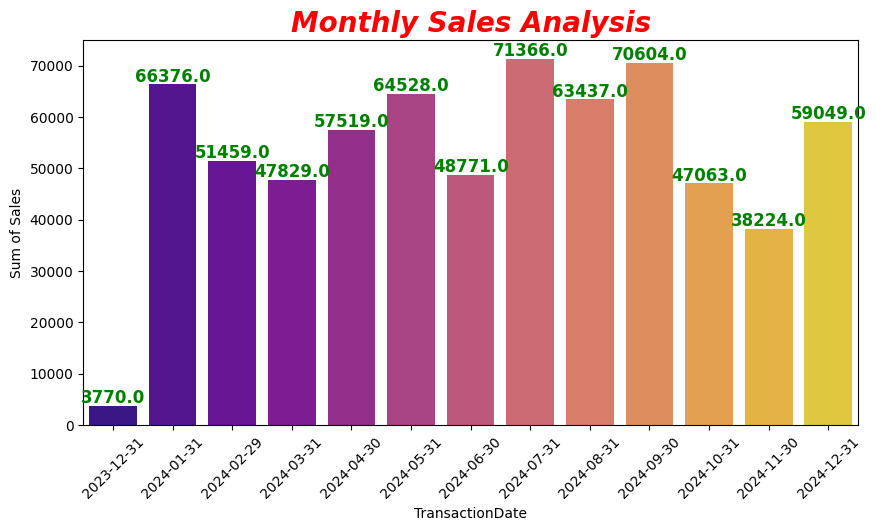

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(x = monthly_sales.index, y = monthly_sales.values,hue = monthly_sales.index,
            legend=False,palette='plasma')
for i, val in enumerate(monthly_sales.index):
    plt.annotate(f"{monthly_sales[val]}",xy = (i,monthly_sales[val]),xytext=(0,2),size = 12,color = 'green',
                 weight = 'bold',textcoords='offset points',ha = 'center')
plt.xticks(rotation = 45)
plt.ylabel("Sum of Sales")
plt.title("Monthly Sales Analysis",size = 20, weight = 'bold',style = 'italic',color = 'red')
plt.show()

## Monthly Sales Trend

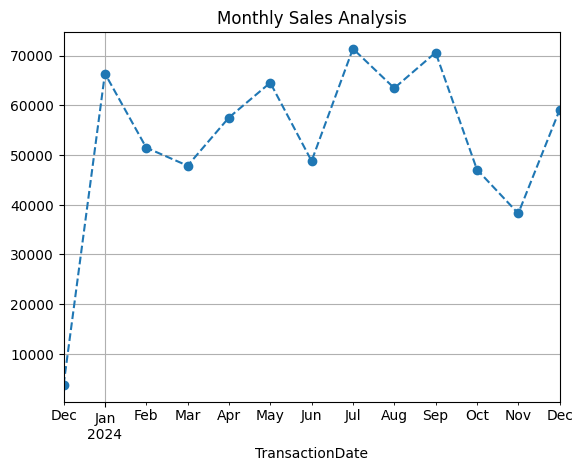

In [34]:
monthly_sales.plot(grid = True,marker = "o",style = '--',title = "Monthly Sales Analysis")
plt.show()

<font size = 6 color = steelblue> **Sales by Region or Category**

In [35]:
cat_reg = data.groupby(['Region','Category']).sum(numeric_only=True)
cat_reg

Quantity  TotalValue     Price
Region        Category                                   
Asia          Books             120    33119.03  13639.69
              Clothing          166    49353.09  17200.90
              Electronics       132    35658.15  16067.60
              Home Decor        142    33944.70  12231.84
Europe        Books             165    47464.42  18557.69
              Clothing          119    36335.59  14137.76
              Electronics       144    41562.60  16090.71
              Home Decor        167    40892.02  15696.99
North America Books             155    41811.99  18135.24
              Clothing          147    38038.49  16276.36
              Electronics       153    44716.43  17574.65
              Home Decor        138    27746.49  12732.82
South America Books             241    69752.03  25409.46
              Clothing          158    42443.49  16932.75
              Electronics       198    58846.32  23602.43
              Home Decor        192    48310.72  18267.18

In [36]:
cat_reg.loc['Europe'] # Sales in Europe by Category

,Quantity,TotalValue,Price
Category,,,
Books,165,47464.42,18557.69
Clothing,119,36335.59,14137.76
Electronics,144,41562.60,16090.71
Home Decor,167,40892.02,15696.99


In [37]:
cat_reg.loc['South America','Electronics'] # Sales in South America in Electronics Category

Quantity        198.00
TotalValue    58846.32
Price         23602.43
Name: (South America, Electronics), dtype: float64

## Quarterly Sales Analysis

In [38]:
data['Quarter'] = data['TransactionDate'].dt.to_period('Q')
quarterly_sales = data.groupby('Quarter').sum(numeric_only=True).sort_values(by="TotalValue",ascending=False)
quarterly_sales

,Quantity,TotalValue,Price
Quarter,,,
2024Q3,739,205406.88,79536.67
2024Q2,608,170817.98,67855.09
2024Q1,660,165664.39,66958.13
2024Q4,518,144336.79,56955.46
2023Q4,12,3769.52,1248.72


In [39]:
quarterly_sales = quarterly_sales.drop(columns = ['Quantity','Price']).round(0)
quarterly_sales = quarterly_sales.TotalValue

In [40]:
quarterly_sales

Quarter
2024Q3    205407.0
2024Q2    170818.0
2024Q1    165664.0
2024Q4    144337.0
2023Q4      3770.0
Freq: Q-DEC, Name: TotalValue, dtype: float64

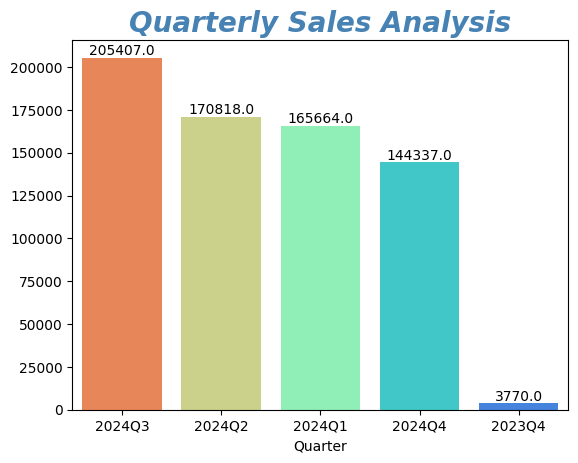

In [41]:
sns.barplot(x = quarterly_sales.index,y = quarterly_sales.values,hue = quarterly_sales.index,
            legend=False,palette='rainbow_r')
for i,val in enumerate(quarterly_sales.index):
    plt.annotate(f"{quarterly_sales[val]}",xytext=(0,2),xy = (i,quarterly_sales[val]),
                 textcoords='offset points',ha = 'center')
plt.title("Quarterly Sales Analysis",size = 20,weight = 'bold',style = 'italic',color = 'steelblue')    
plt.show()    

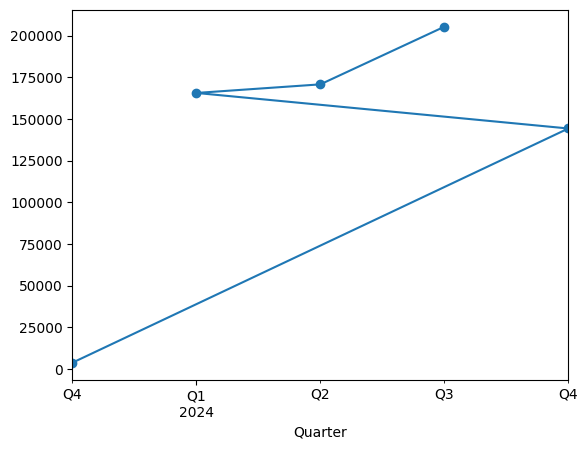

In [42]:
quarterly_sales.plot(marker = 'o')
plt.show()